# Reprojection 
In this example we will create GeoDataFrames using an unprojected reference system WGS84 [EPSG:4326](https://epsg.io/4326)  adding some points and polygons, then we will change the CRS into a WGS84 Transverse Mercator coordinate reference system [EPSG:32632](https://epsg.io/32632), and finally we change again the CRS using [EPSG:3035](https://epsg.io/3035), another projected reference system with a different datum and projection.

In [22]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

## Points and Polygons
We create some points of (latitude, longitude) coordinate pairs and polygons using the unprojected coordinate system WGS84 ([EPSG:4326](https://epsg.io/4326)) 

In [102]:
ancona = Point(13.516759030178973, 43.616981322253174)
corinaldo = Point(13.049195930621709, 43.648832985051826)
pergola = Point(12.836472564469215, 43.56165937486001)
fabriano = Point(12.904426736174587, 43.333135653018644)
camerino = Point(13.069720952624685, 43.13575640876881)
tolentino = Point(13.285526127229707, 43.20802624129122)
civitanova = Point(13.730063928797744, 43.30743501558867)

We create a geodataframe by setting the geometry of each record and the coordnate reference system

In [103]:
names = ['Ancona', 'Corinaldo', 'Pergola', 'Fabriano', 'Camerino', 'Tolentino', 'Civitanova']
geometries = [ancona, corinaldo, pergola, fabriano, camerino, tolentino, civitanova]
places = {'Place': names, 'geometry': geometries}

places_gdf = gpd.GeoDataFrame(places, crs="EPSG:4326")
places_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [104]:
places_gdf

,Place,geometry
0,Ancona,POINT (13.51676 43.61698)
1,Corinaldo,POINT (13.04920 43.64883)
2,Pergola,POINT (12.83647 43.56166)
3,Fabriano,POINT (12.90443 43.33314)
4,Camerino,POINT (13.06972 43.13576)
5,Tolentino,POINT (13.28553 43.20803)
6,Civitanova,POINT (13.73006 43.30744)


<AxesSubplot:>

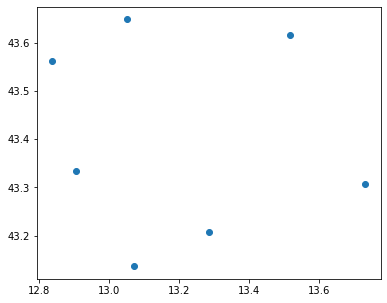

In [105]:
fig, ax = plt.subplots(1, figsize=(10, 5))
places_gdf.plot(ax=ax)

We create a polygon from the points that have been defined and a geo dataframe using the same WGS84 coordinate reference system. A polygon starts and ends with the same point.

In [106]:
geometries.append(ancona)
places_poligon = Polygon(geometries)
ancona_polygon = {'Polygon': ['Ancona Polygon'], 'geometry': places_poligon}
blue_poligon_df = gpd.GeoDataFrame(ancona_polygon, crs ="EPSG:4326")

<AxesSubplot:>

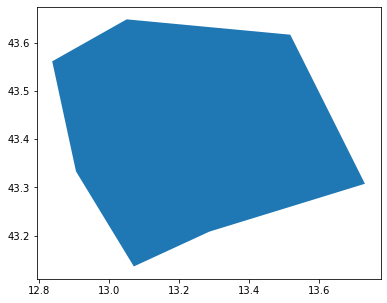

In [107]:
fig, ax = plt.subplots(1, figsize=(10, 5))
blue_poligon_df.plot(ax=ax)

We create a 2nd polygon that lies within the 1st one

In [108]:
pollenza = Point(13.348327008723794, 43.267747099681664)
macerata = Point(13.453648702662996, 43.29998523010854)
recanati = Point(13.549725428303592, 43.402275676832225)
cingoli = Point(13.215093036131329, 43.3753164922384)

names = ['Pollenza', 'Macerata', 'Recanati', 'Cingoli']
geometries = [pollenza, macerata, recanati, cingoli]
places = {'Place': names, 'geometry': geometries}

places2_gdf = gpd.GeoDataFrame(places, crs="EPSG:4326")

In [109]:
geometries.append(pollenza) 
places_poligon = Polygon(geometries)
pollenza_polygon = {'Polygon': ['Pollenza Polygon'], 'geometry': places_poligon}
orange_polygon_df = gpd.GeoDataFrame(pollenza_polygon, crs ='EPSG:4326')

<AxesSubplot:>

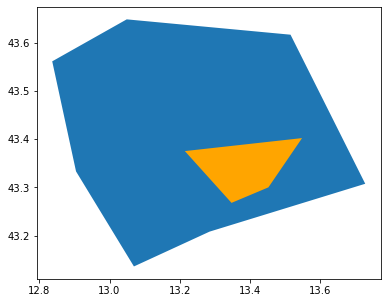

In [110]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ancona_poligon_df.plot(ax=ax)
orange_polygon_df.plot(ax=ax, color='orange')

A 3rd polygon intersects the 1st one and touches the 2nd one

In [111]:
assisi = Point(12.614701534142005, 43.07119190994771)
foligno = Point(12.703168606899375, 42.9562108203491)

names = ['Assisi', 'Foligno', 'Cingoli']
geometries = [assisi, foligno, cingoli]
places = {'Place': names, 'geometry': geometries}

geometries.append(assisi)
places_poligon = Polygon(geometries)
assisi_polygon = {'Polygon': ['Assisi Polygon'], 'geometry': places_poligon}
red_polygon_df = gpd.GeoDataFrame(assisi_polygon, crs ='EPSG:4326')

<AxesSubplot:>

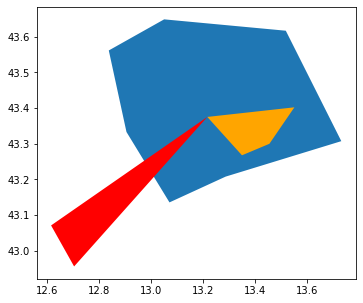

In [113]:
fig, ax = plt.subplots(1, figsize=(10, 5))
blue_poligon_df.plot(ax=ax)
orange_polygon_df.plot(ax=ax, color='orange')
red_polygon_df.plot(ax=ax, color='red')

## Spatial relationship
We apply the topological operators within, intersects and touch, between the polygons that we have defined.

### within
From the [operator definition](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.within.html) in Geopandas: "An object is said to be within another if at least one of its points is located in the interior and no points are located in the exterior of the other."

In [114]:
orange_polygon_df.within(blue_poligon_df)

0    True
dtype: bool

In [115]:
red_polygon_df.within(blue_poligon_df)

0    False
dtype: bool

### intersects
From the [operator definition](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.intersects.html) in GeoPandas: "An object is said to intersect another if its boundary and interior intersects in any way with those of the other."

In [116]:
orange_polygon_df.intersects(blue_poligon_df)

0    True
dtype: bool

In [117]:
red_polygon_df.intersects(blue_poligon_df)

0    True
dtype: bool

In [119]:
red_polygon_df.intersects(orange_polygon_df)

0    True
dtype: bool

### touches
From the [operator definition](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.touches.html): "An object is said to touch another if it has at least one point in common with other and its interior does not intersect with any part of the other. Overlapping features therefore do not touch." 

In [120]:
orange_polygon_df.touches(blue_poligon_df)

0    False
dtype: bool

In [121]:
red_polygon_df.touches(blue_poligon_df)

0    False
dtype: bool

In [122]:
red_polygon_df.touches(orange_polygon_df)

0    True
dtype: bool

## Projections
Now we change the CRS to project the coordinates of the points and polygons onto a plane. We use the Transverse Mercato projection. We will replace the unprojected EPSG:4362 CRS that we have used so far to the EPSG:32632 CRS that uses the same datum and also a Transverse Mercator projection. The coordinate will be in meters instead of degrees. We reproject all the three polygons.

In [124]:
blue_poligon_df_epsg32632 = blue_poligon_df.copy()
blue_poligon_df_epsg32632.to_crs(epsg=32632, inplace=True)
blue_poligon_df_epsg32632.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [126]:
blue_poligon_df_epsg32632['geometry']

0    POLYGON ((864467.163 4839253.907, 826562.436 4...
Name: geometry, dtype: geometry

In [142]:
orange_polygon_df_epsg32632 = orange_polygon_df.copy()
orange_polygon_df_epsg32632.to_crs(epsg=32632, inplace=True)

In [130]:
red_polygon_df_epsg32632 = red_polygon_df.copy()
red_polygon_df_epsg32632.to_crs(epsg=32632, inplace=True)

## Spatial relationship using a projected coordinate reference system
We use the topological operators to see whether the spatial relationships between the polygons still hold true after the change of the CRS. As we can see all of them are still valid.

### From EPSG:4326 to EPSG:32632

### within

In [131]:
orange_polygon_df_epsg32632.within(blue_poligon_df_epsg32632)

0    True
dtype: bool

In [132]:
red_polygon_df_epsg32632.within(blue_poligon_df_epsg32632)

0    False
dtype: bool

### intersects

In [133]:
orange_polygon_df_epsg32632.intersects(blue_poligon_df_epsg32632)

0    True
dtype: bool

In [134]:
red_polygon_df_epsg32632.intersects(blue_poligon_df_epsg32632)

0    True
dtype: bool

In [135]:
red_polygon_df_epsg32632.intersects(orange_polygon_df_epsg32632)

0    True
dtype: bool

### touches

In [136]:
orange_polygon_df_epsg32632.touches(blue_poligon_df_epsg32632)

0    False
dtype: bool

In [137]:
red_polygon_df_epsg32632.touches(blue_poligon_df_epsg32632)

0    False
dtype: bool

In [138]:
red_polygon_df_epsg32632.touches(orange_polygon_df_epsg32632)

0    True
dtype: bool

<AxesSubplot:>

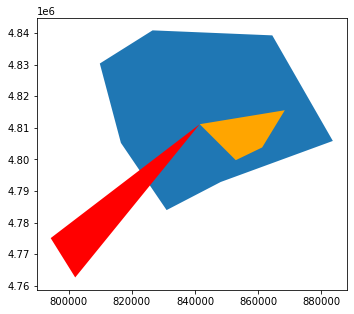

In [139]:
fig, ax = plt.subplots(1, figsize=(10, 5))
blue_poligon_df_epsg32632.plot(ax=ax)
orange_polygon_df_epsg32632.plot(ax=ax, color='orange')
red_polygon_df_epsg32632.plot(ax=ax, color='red')

### From EPSG:32632 to EPSG:3035

In [140]:
blue_poligon_df_epsg3035 = blue_poligon_df_epsg32632.copy()
blue_poligon_df_epsg3035.to_crs(epsg=3035, inplace=True)
blue_poligon_df_epsg3035.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

In [149]:
orange_polygon_df_epsg3035 = orange_polygon_df_epsg32632.copy()
orange_polygon_df_epsg3035.to_crs(epsg=3035, inplace=True)

In [150]:
red_polygon_df_epsg3035 = red_polygon_df_epsg32632.copy()
red_polygon_df_epsg3035.to_crs(epsg=3035, inplace=True)

### within

In [151]:
orange_polygon_df_epsg3035.within(blue_poligon_df_epsg3035)

0    True
dtype: bool

In [152]:
red_polygon_df_epsg3035.within(blue_poligon_df_epsg3035)

0    False
dtype: bool